In [2]:
!pip install git+https://github.com/scverse/squidpy@main --user

  Cloning https://github.com/scverse/squidpy (to revision main) to c:\users\douglashannumjr\appdata\local\temp\pip-req-build-oucbibjf
  Resolved https://github.com/scverse/squidpy to commit 3684f11df95f722f9b89b7388123139781281bd8
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Cloning https://github.com/saezlab/omnipath (to revision master) to c:\users\douglashannumjr\appdata\local\temp\pip-install-jky135e8\omnipath_27fd9a3ea26a4bf2891af62596c71b78
  Resolved https://github.com/saezlab/omnipath to commit 21be9a8495d5d5a318b0d8f33c1a32b2cae56b20
  Installing build dependencies: started
  Installing buil

  Running command git clone --filter=blob:none --quiet https://github.com/scverse/squidpy 'C:\Users\DouglasHannumJr\AppData\Local\Temp\pip-req-build-oucbibjf'
  Running command git clone --filter=blob:none --quiet https://github.com/saezlab/omnipath 'C:\Users\DouglasHannumJr\AppData\Local\Temp\pip-install-jky135e8\omnipath_27fd9a3ea26a4bf2891af62596c71b78'
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\DouglasHannumJr\\AppData\\Roaming\\Python\\Python310\\site-packages\\~~ndas\\_libs\\algos.cp310-win_amd64.pyd'
Check the permissions.



In [3]:
import numpy as np
import pandas as pd
import scanpy as sc
from scipy.cluster import hierarchy as sch
from matplotlib import pyplot as plt
from copy import deepcopy
%matplotlib inline

In [4]:
import squidpy as sq

In [5]:
import os

In [6]:
os.getcwd()

'C:\\Users\\DouglasHannumJr\\OneDrive - Vizgen\\Desktop\\python_scripts'

In [7]:
data_dir = '../../data/vz-ffpe-showcase/HumanLiverCancerPatient1/'

In [8]:
os.chdir(data_dir)

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../../data/vz-ffpe-showcase/HumanLiverCancerPatient1/'

In [7]:
os.listdir()

['cell_by_gene.csv', 'cell_metadata.csv']

In [8]:
adata = sq.read.vizgen(
    './',
    counts_file = 'cell_by_gene.csv',
    meta_file='cell_metadata.csv')

In [9]:
adata.obs

fov       volume        min_x        max_x        min_y        max_y
0       1920   391.412998  8562.654437  8574.061079   -96.458280   -91.321376
1       1833  1197.175757  8516.506670  8530.461025   -94.504732   -81.748570
2       1833   860.404057  8351.321621  8364.973347   -94.406302   -83.894814
3       1833  1401.940817  8376.058773  8396.108469   -94.405825   -83.376493
4       1833  1035.620783  8417.109774  8434.578575   -94.406271   -83.483583
...      ...          ...          ...          ...          ...          ...
568350  1680   503.305605  7688.416929  7697.597676  4636.551852  4645.300485
568351  1721   796.063864  7874.743484  7885.154212  4640.357186  4651.256147
568352  1768   514.320655  8083.702828  8091.689059  4640.609502  4649.753689
568353  1680   640.944080  7766.187659  7774.896369  4648.694933  4659.727484
568354  1680   560.615751  7752.177983  7762.170380  4649.732097  4658.274688

[568355 rows x 6 columns]

In [10]:
adata.var_names_make_unique()

In [11]:
sc.pp.filter_cells(adata, min_counts = 50)

In [12]:
sc.pp.filter_genes(adata, min_cells = 10)

In [13]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.scale(adata, max_value = 10)

In [14]:
resolution = 1.5
sc.tl.pca(adata, svd_solver = 'arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = resolution)

C:\Users\DouglasHannumJr\AppData\Roaming\Python\Python310\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\DouglasHannumJr\AppData\Roaming\Python\Python310\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\DouglasHannumJr\AppData\Roaming\Python\Python

C:\Users\DouglasHannumJr\AppData\Roaming\Python\Python310\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


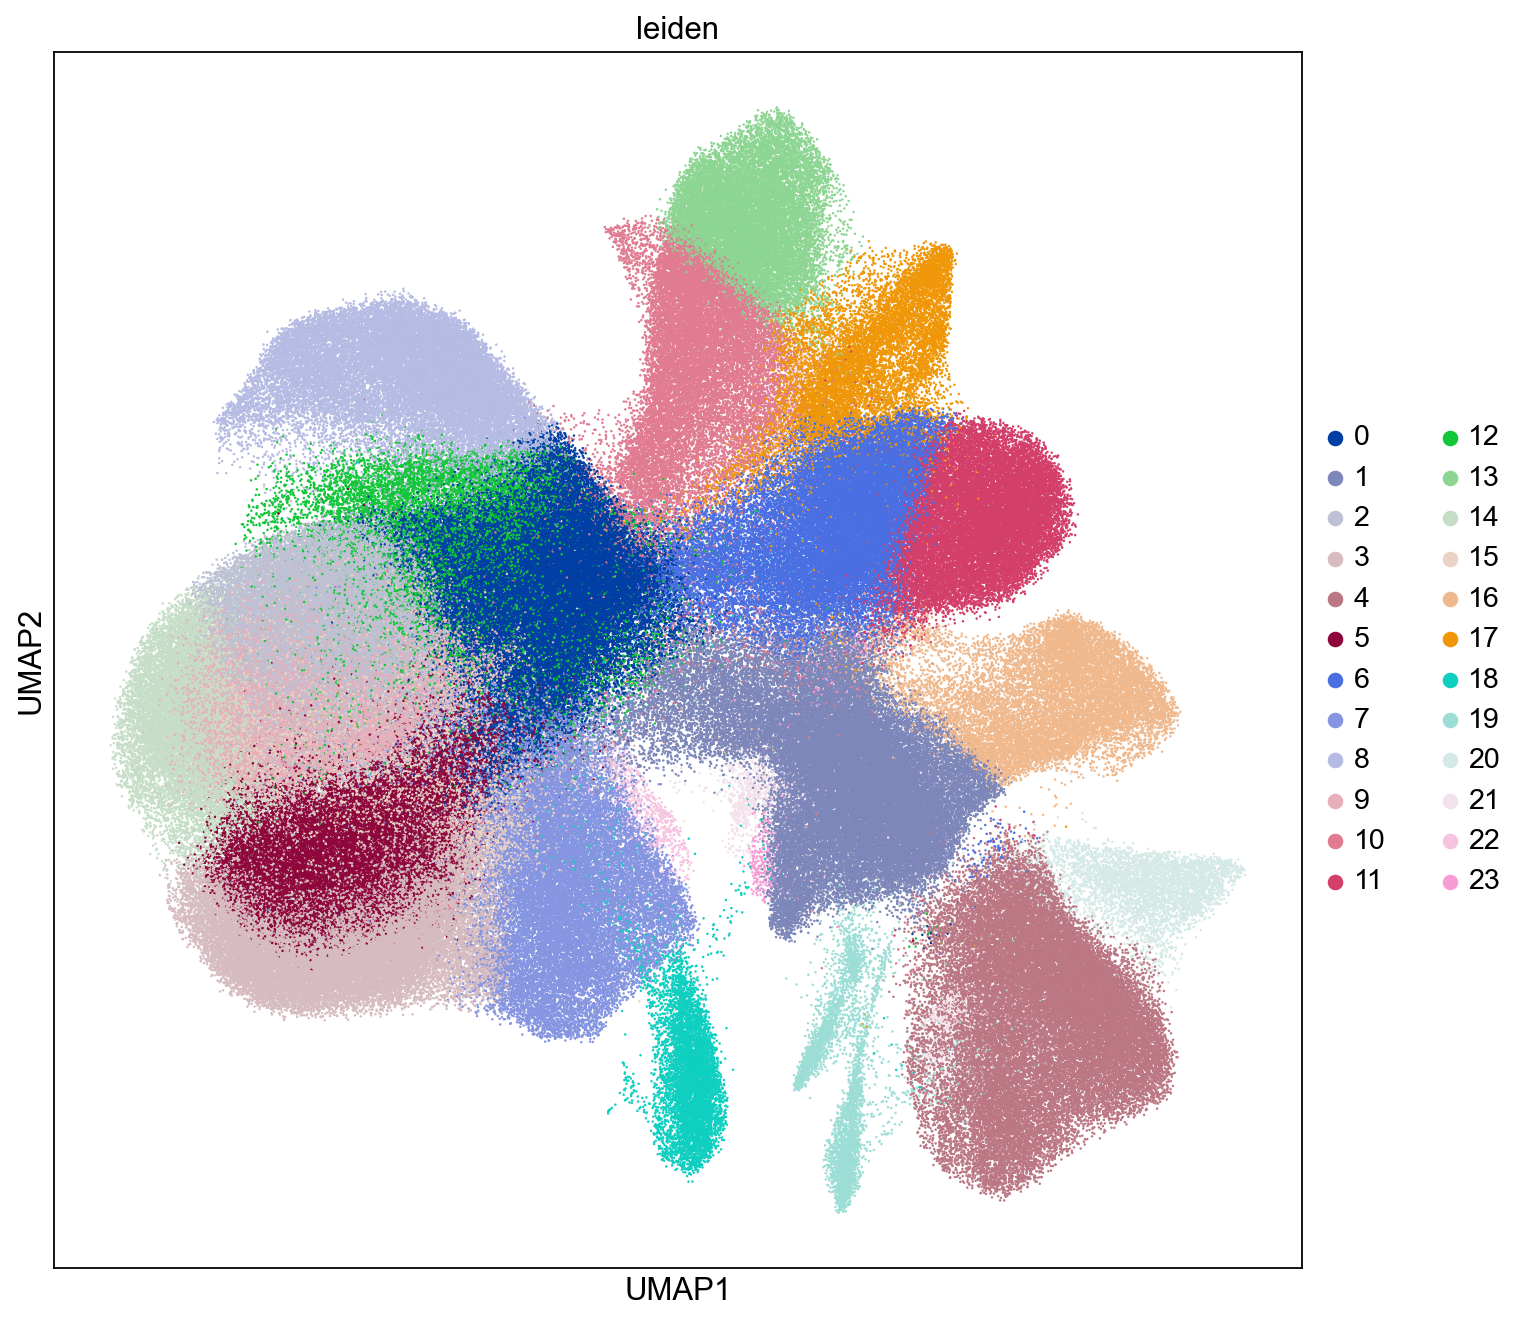

In [16]:
sc.set_figure_params(figsize=(10,10))
sc.pl.umap(adata, color=['leiden'], size = 5)

C:\Users\DouglasHannumJr\OneDrive - Vizgen\Desktop\squidpy_0518\squidpy\squidpy\pl\_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


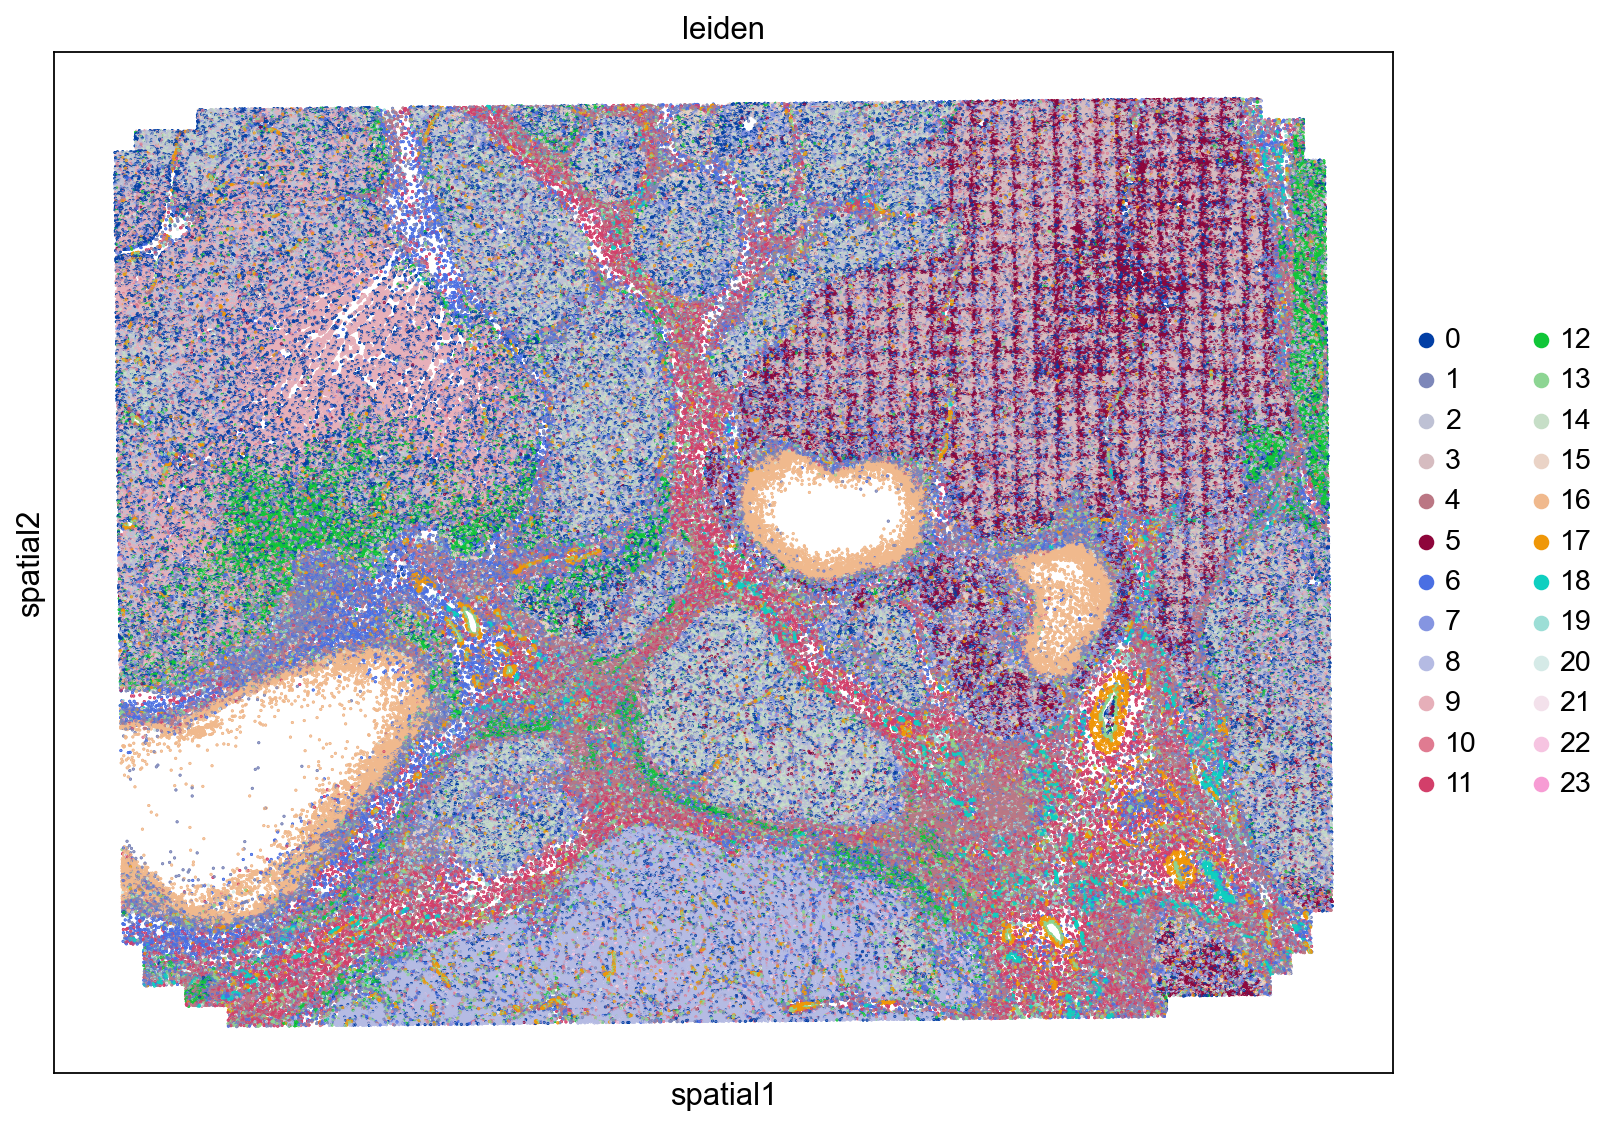

In [17]:
sq.pl.spatial_scatter(
    adata,
    shape = None,
    color = 'leiden',
    size = 0.5,
    library_id = 'spatial',
    figsize = (10,10)
)